In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import html5lib

from wordcloud import WordCloud, STOPWORDS
import nltk 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk import everygrams
from collections import Counter
stopwords = set(STOPWORDS)

In [ ]:
url = r"https://naacl2019.org/program/accepted/"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html5lib')
print(soup.prettify())

We find the entire content we need nicely wrapped up in an article tag. Each individual paper details are in the p tag, which are children of the article tag. So all we have to do is find all the p tags inside article and this is exactly what we do in one line of beautiful-soup code! 

In [3]:
# Find all <p> which are children of <article class='page'>
list_of_papers = soup.find('article', {'class':'page'}).findAll("p")
papers = [paper.text.split("\n") for paper in list_of_papers]
print(papers[0:5])

[['“President Vows to Cut <Taxes> Hair”: Dataset and Analysis of Creative Text Editing for Humorous Headlines', 'Nabil Hossain, John Krumm and Michael Gamon'], ['A Capsule Network-based Embedding Model for Knowledge Graph Completion and Search Personalization', 'Dai Quoc Nguyen, Thanh Vu, Tu Dinh Nguyen, Dat Quoc Nguyen and Dinh Phung'], ['A Complex-valued Network for Matching', 'Qiuchi Li, Benyou Wang and Massimo Melucci'], ['A corpus of text-image discourse relations', 'Malihe Alikhani, Sreyasi Nag Chowdhury, Gerard de Melo and Matthew Stone'], ['A Crowdsourced Corpus of Multiple Judgments and Disagreement on Anaphoric Interpretation', 'Massimo Poesio, Jon Chamberlain, Silviu Paun, Juntao Yu, Alexandra Uma and Udo Kruschwitz']]


In [4]:
df = pd.DataFrame({
    "title": [paper[0] for paper in papers],
    "authors": [paper[1] for paper in papers]
})

df.head()

,title,authors
0,“President Vows to Cut <Taxes> Hair”: Dataset ...,"Nabil Hossain, John Krumm and Michael Gamon"
1,A Capsule Network-based Embedding Model for Kn...,"Dai Quoc Nguyen, Thanh Vu, Tu Dinh Nguyen, Dat..."
2,A Complex-valued Network for Matching,"Qiuchi Li, Benyou Wang and Massimo Melucci"
3,A corpus of text-image discourse relations,"Malihe Alikhani, Sreyasi Nag Chowdhury, Gerard..."
4,A Crowdsourced Corpus of Multiple Judgments an...,"Massimo Poesio, Jon Chamberlain, Silviu Paun, ..."


In [5]:
# Parse author names into a list for future processing
def parse_authors(authors):
    authors = authors.replace(" and ", ",")
    authors = authors.split(",")
    authors = [author.lstrip(" ").rstrip(" ") for author in authors]
    return authors

%time df['authors'] = df['authors'].apply(parse_authors)
df.head()

CPU times: user 2.57 ms, sys: 0 ns, total: 2.57 ms
Wall time: 2.48 ms


,title,authors
0,“President Vows to Cut <Taxes> Hair”: Dataset ...,"[Nabil Hossain, John Krumm, Michael Gamon]"
1,A Capsule Network-based Embedding Model for Kn...,"[Dai Quoc Nguyen, Thanh Vu, Tu Dinh Nguyen, Da..."
2,A Complex-valued Network for Matching,"[Qiuchi Li, Benyou Wang, Massimo Melucci]"
3,A corpus of text-image discourse relations,"[Malihe Alikhani, Sreyasi Nag Chowdhury, Gerar..."
4,A Crowdsourced Corpus of Multiple Judgments an...,"[Massimo Poesio, Jon Chamberlain, Silviu Paun,..."


In [6]:
# Add few handpicked words to our stopwords list
[stopwords.add(word) for word in ['based','using','via','towards','improving']]

# Split, lower and remove stopwords to create tokens
tokens = nltk.word_tokenize(' '.join(df['title'].values))
tokens = [token.lower() for token in tokens]
tokens = [token for token in tokens if token.isalpha() and token not in stopwords]

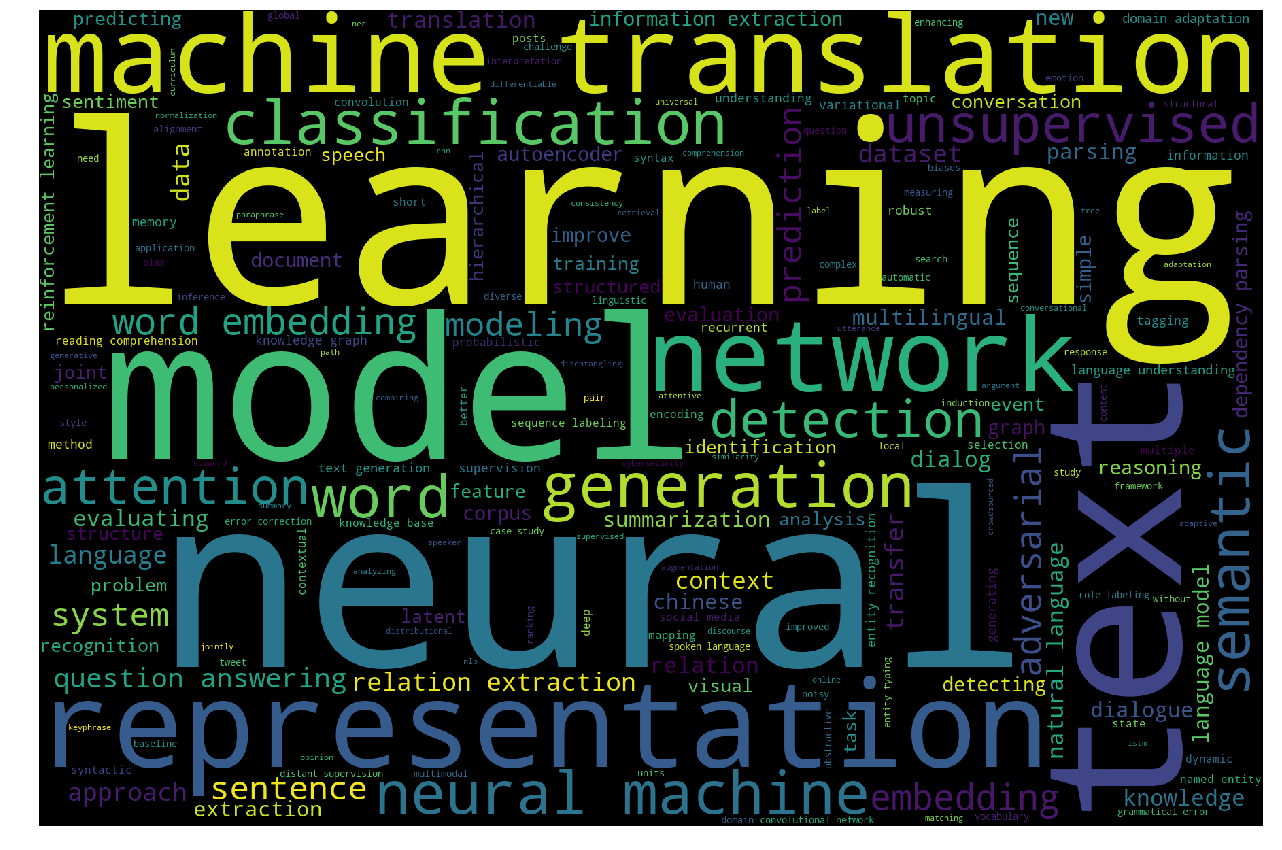

In [7]:
# Generate wordcloud, plot and save it 
wordcloud = WordCloud(stopwords=stopwords,width=1800, height=1200, background_color='black').generate(' '.join(tokens))
plt.figure( figsize=(30,15) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("naacl-word-cloud.png")

In [8]:
# Generate bigram using NLTK
bigrams = nltk.bigrams(tokens)

# Generate 3 to 7 ngrams
ngram = everygrams(tokens, 3, 7)

# Count ngrams by no. of occurances
top_bigrams = Counter(bigrams)
top_ngrams = Counter(ngram)
top_words = Counter(tokens)

# Sort ngrams by no. of occurances
top_words = sorted(top_words.items(), key=lambda kv: kv[1], reverse=True)[0:100]
top_bigrams = sorted(top_bigrams.items(), key=lambda kv: kv[1], reverse=True)[0:100]
top_ngrams = sorted(top_ngrams.items(), key=lambda kv: kv[1], reverse=True)[0:100]

In [9]:
# Utility to print sorted ngrams nicely
def print_top(top_list):
    for text,count in top_list:
        print("{0} - {1}".format(" ".join(text),count))

In [10]:
# Print top ngrams
print_top(top_ngrams[0:25])
print_top(top_bigrams[0:25])

neural machine translation - 21
named entity recognition - 5
grammatical error correction - 4
spoken language understanding - 4
neural relation extraction - 3
adaptation neural machine - 3
supervision relation extraction - 3
semantic role labeling - 3
open information extraction - 3
adaptation neural machine translation - 3
model knowledge graph - 2
knowledge graph completion - 2
framework information extraction - 2
graph convolutional networks - 2
multilingual neural machine - 2
better word embeddings - 2
domain adaptation neural - 2
task oriented dialogs - 2
distant supervision relation - 2
domain adaptation tagging - 2
discovery knowledge base - 2
fake news detection - 2
chinese word segmentation - 2
dialogue state tracking - 2
machine reading comprehension - 2
machine translation - 24
neural machine - 21
word embeddings - 16
question answering - 14
relation extraction - 12
natural language - 9
information extraction - 8
dependency parsing - 8
reinforcement learning - 7
language und